# Introduction to regression models

Import relevant libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [92]:
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

In [93]:
wine_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

## Exploratory data analysis

Explore the dataset. Visualize the data and try to understand what is the number of observations, where are the features and which is the target.

In [94]:
wine_df.shape

(1599, 12)

In [95]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [96]:
wine_df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

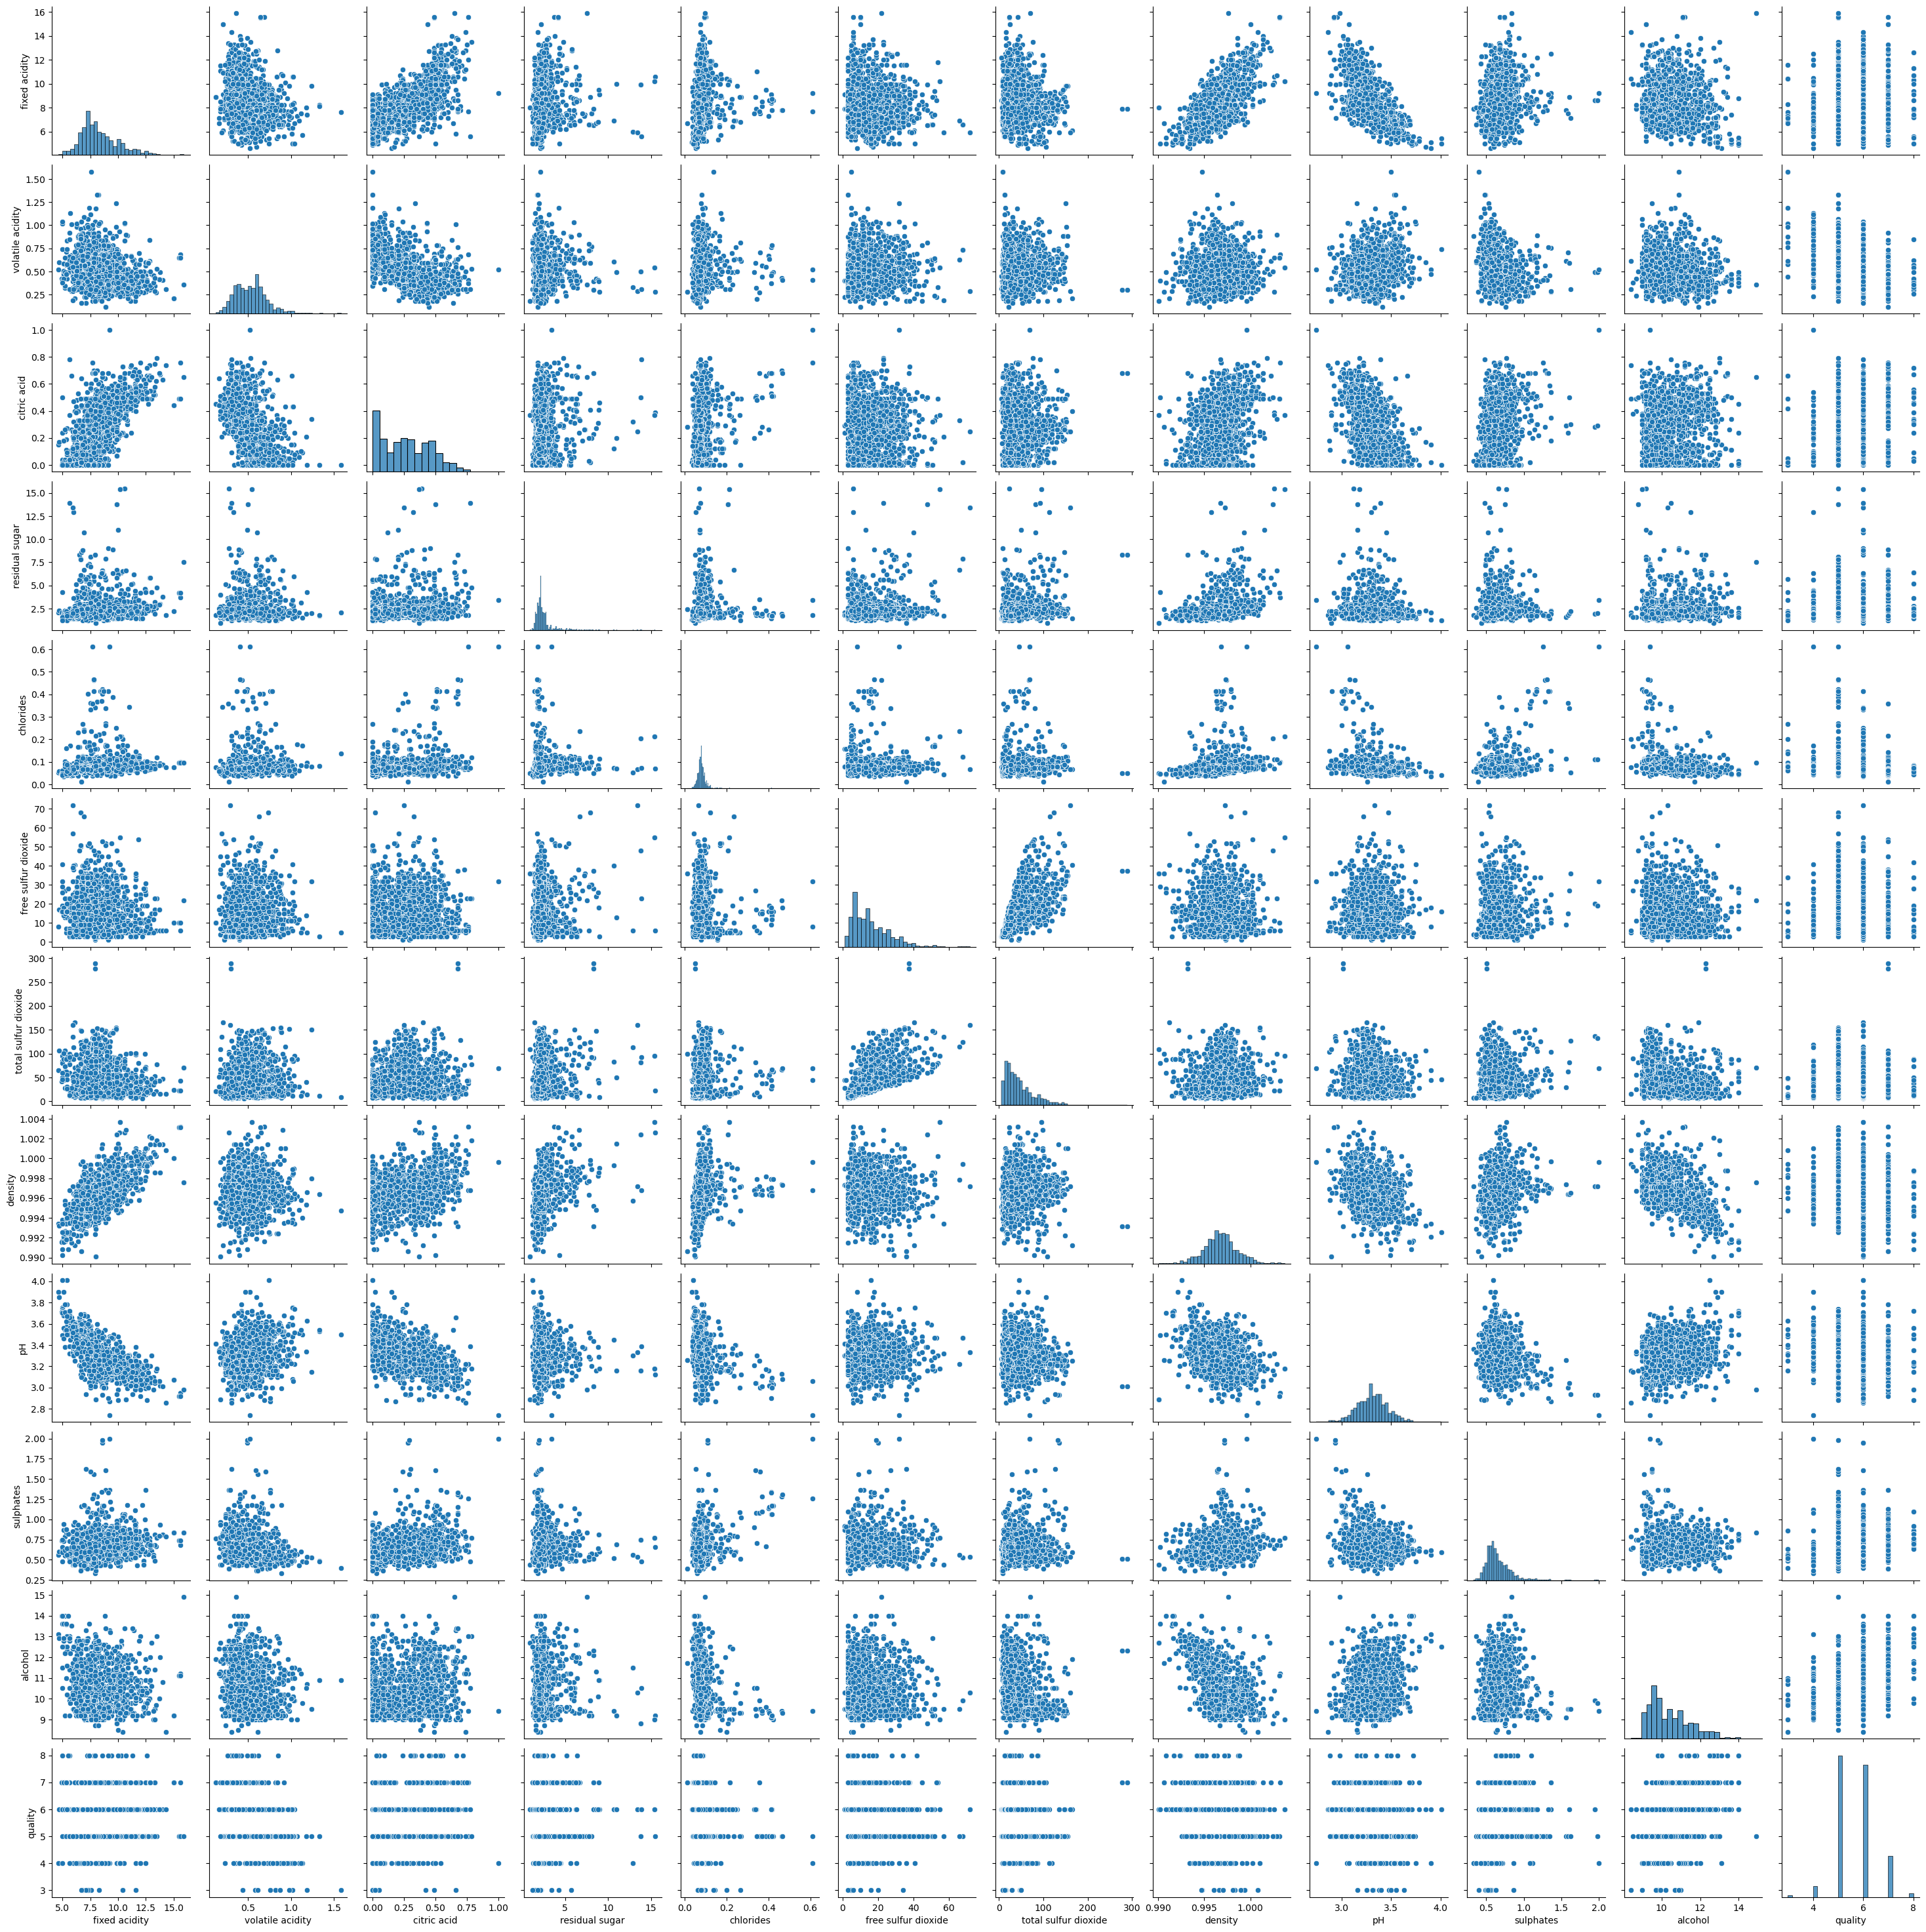

In [145]:
sns.pairplot(wine_df, palette="Set1")

<AxesSubplot:>

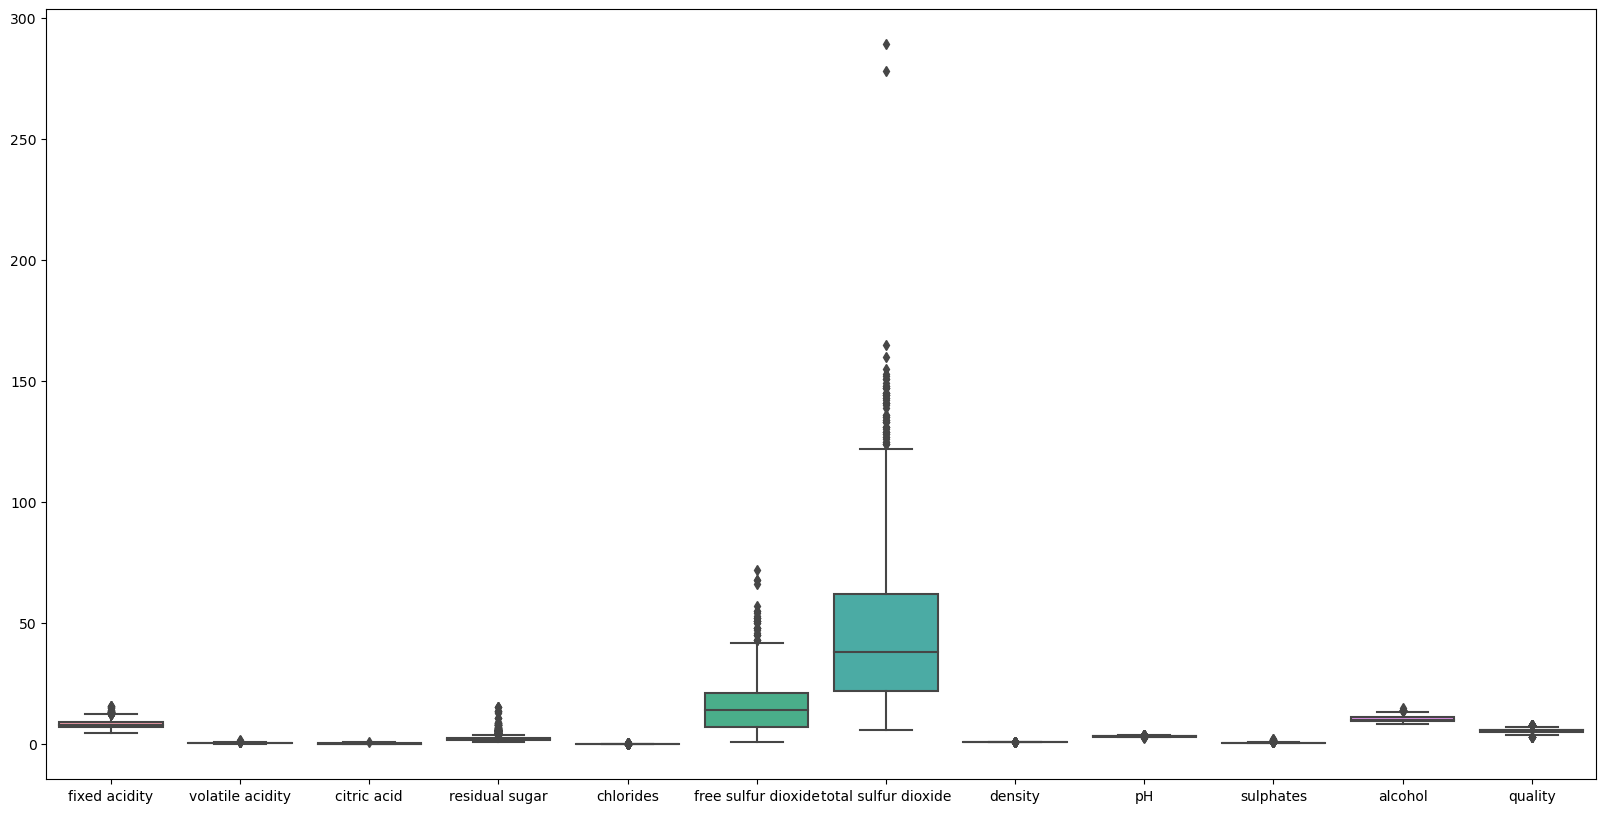

In [151]:
plt.figure(figsize=(20,10))
sns.boxplot(data=wine_df)

n = 1599
il y a 11 features et la target est quality

## Create your own linear model

Get 100 samples with random state (seed) = 1

In [97]:
df_random= wine_df.sample(n=100, replace=False, random_state=1)
df_random

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
75              8.8             0.410         0.64             2.2      0.093   
1283            8.7             0.630         0.28             2.7      0.096   
408            10.4             0.340         0.58             3.7      0.174   
1281            7.1             0.460         0.20             1.9      0.077   
1118            7.1             0.390         0.12             2.1      0.065   
...             ...               ...          ...             ...        ...   
529             9.9             0.630         0.24             2.4      0.077   
912            10.0             0.460         0.44             2.9      0.065   
1227            9.0             0.580         0.25             2.0      0.104   
1374            6.8             0.815         0.00             1.2      0.267   
1198            7.7             0.260         0.26             2.0      0.052   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
75                    9.0                  42.0  0.99860  3.54       0.66   
1283                 17.0                  69.0  0.99734  3.26       0.63   
408                   6.0                  16.0  0.99700  3.19       0.70   
1281                 28.0                  54.0  0.99560  3.37       0.64   
1118                 14.0                  24.0  0.99252  3.30       0.53   
...                   ...                   ...      ...   ...        ...   
529                   6.0                  33.0  0.99740  3.09       0.57   
912                   4.0                   8.0  0.99674  3.33       0.62   
1227                  8.0                  21.0  0.99769  3.27       0.72   
1374                 16.0                  29.0  0.99471  3.32       0.51   
1198                 19.0                  77.0  0.99510  3.15       0.79   

      alcohol  quality  
75       10.5        5  
1283     10.2        6  
408      11.3        6  
1281     10.4        6  
1118     13.3        6  
...       ...      ...  
529       9.4        5  
912      12.2        6  
1227      9.6        5  
1374      9.8        3  
1198     10.9        6  

[100 rows x 12 columns]

Plot pH in function of fixed acidity

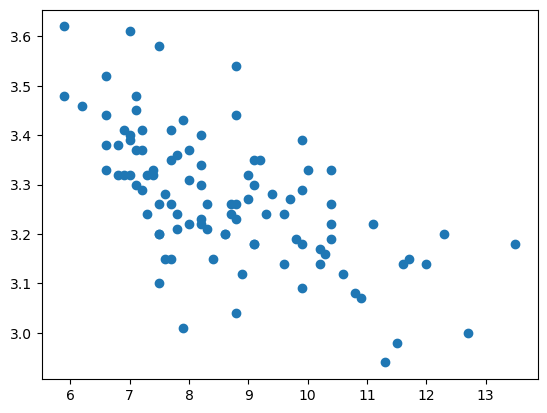

In [98]:
plt.scatter(x=df_random['fixed acidity'], y= df_random['pH'])
plt.show()

What can you say about pH and fixed acidity? are they correlated ? 

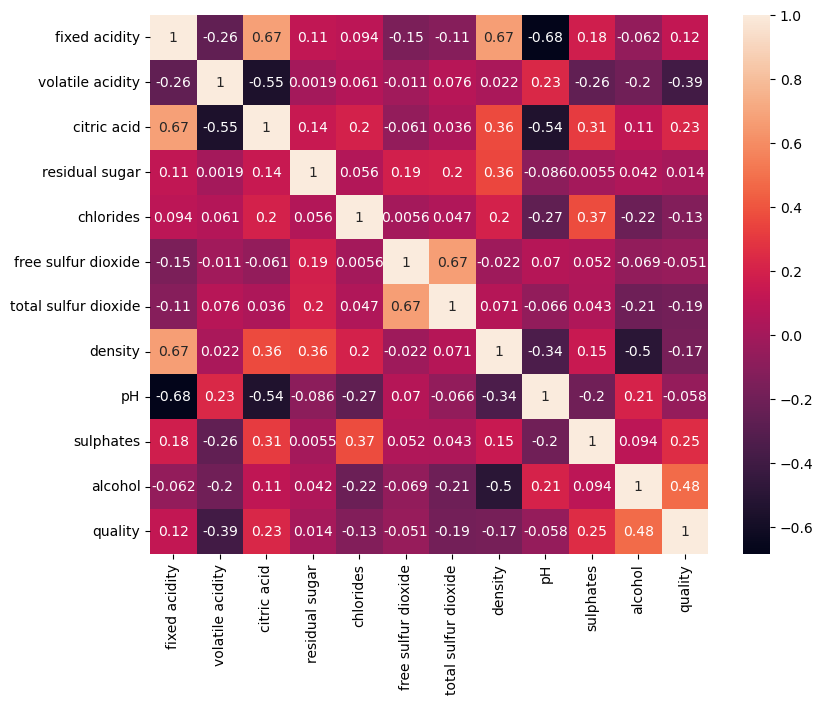

In [99]:
plt.figure(figsize=(9,7))
corr_matrix = wine_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Il semblerai y avoir une corelation negative. 

Try to find a linear model by hand. plot it with the sample set

Hint: define an intercept and a slope. Then, plot it graphically

y = a * x + b, where a is slope and b is intercept

In [100]:
x= df_random['fixed acidity']
y= df_random['pH']

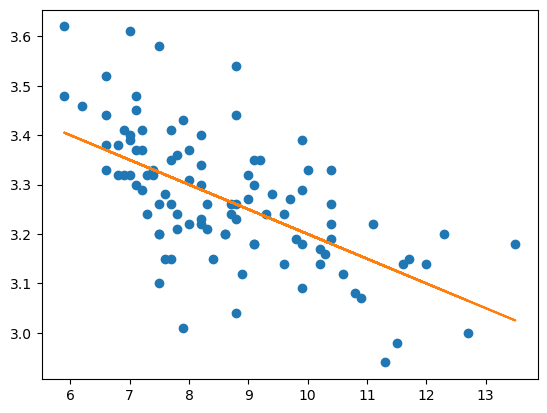

In [101]:
plt.plot(x, y, 'o')
a = -0.05
b = 3.7
plt.plot(x, a*x+b)


In [102]:
import random
a = random.uniform(-0.0, -0.09)
a

-0.024748884483769815

In [103]:
b = random.uniform(3.4,3.8)
b

3.6216478462188975

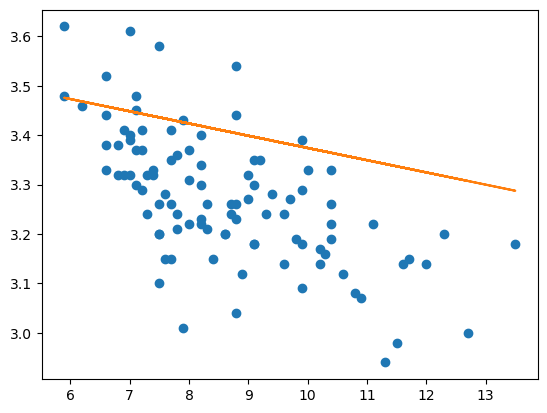

In [104]:
plt.plot(x, y, 'o')
plt.plot(x, a*x+b)

Hint: create your own algorithm to find the best intercept and slope

Help: if you lack of inspiration, you can try to implement the following algorithm:

1) choose a random $b_1$ and fix it. Then calculate the best $b-0$ that minimize the error of the prediction
- define X (fixed acidity) and y (pH)
- define a $b_1$ fixed
- define a range of $b_0$ to test
- define a function predict(x,b0,b1) that returns the predictions (y_pred)
- define a function calculate_error(y, y_pred) that estimate the sum of squared errors $e = \Sigma_i^{100}|y_i - y_{pred_i}|^2$
- for each $b_0$, find the $b_0 min$ that minimize $e$

2) fix $b_0$ with the $b_0 min$ you find before. Then, calculate the best $b_1 min$ that minimizes the error by following the same steps as before

3) fix $b_1$ with the new $b_1 min$ you found. Then, calculate a new $b_0 min$ that minimizes the error by following the same steps

4) reiterate on 2

In [105]:
def predict(x,b0,b1):
    y_pred= b0+ b1*x
    return y_pred
def calculate_error(y,y_pred):
    e=0
    for i in range(100):
        e+= (abs(y.iloc[i] - y_pred.iloc[i]))**2
    return e

In [106]:
test= predict(x,3.6,-0.04)
test

75      3.248
1283    3.252
408     3.184
1281    3.316
1118    3.316
        ...  
529     3.204
912     3.200
1227    3.240
1374    3.328
1198    3.292
Name: fixed acidity, Length: 100, dtype: float64

In [107]:
calculate_error(y,test)

1.15058

what is the best linear model you can find ? try to find the optimal intercept and slope by your own

In [108]:
def better_b0( x, y, b1):
    b0_min=0
    e_min=567944
    for b0 in np.arange(0, 10, 0.01):
        y_pred = predict(x ,b0, b1)
        e = calculate_error(y, y_pred)
        if e < e_min :
            e_min=e
            b0_min=b0
    return b0_min,e_min
       
        

In [109]:
b0= better_b0(x, y, -0.05)
b0

(3.7, 1.0874250000000003)

In [110]:
def better_b1( x, y, b0):
    b1_min=0
    e_min=567944
    for b1 in np.arange(-10, 10, 0.001):
        y_pred = predict(x ,b0, b1)
        e = calculate_error(y, y_pred)
        if e < e_min :
            e_min=e
            b1_min=b1
    return b1_min,e_min

In [111]:
b1=better_b1(x, y, b0[0])
b1

(-0.05000000000551452, 1.0874250000321224)

In [112]:
b0_better= better_b0( x, y, b1[0])
b0_better

(3.7, 1.0874250000321224)

In [113]:
b1_better=better_b1(x, y, b0_better[0])
b1_better

(-0.05000000000551452, 1.0874250000321224)

In [114]:
b1 = b1_better[0]
b0 = b0_better[0]

(faire mes calcule du  mse )

Compare to seaborn regplot

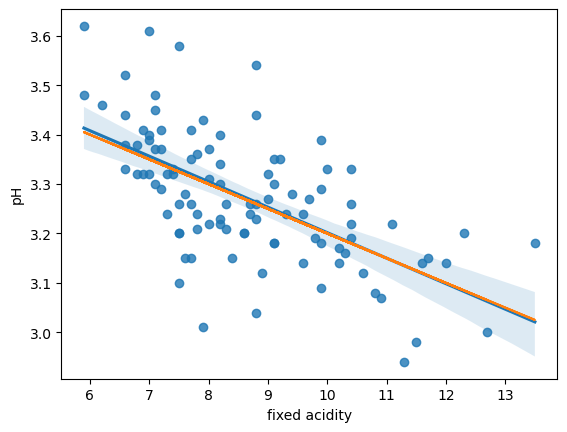

In [115]:
sns.regplot(y='pH', x='fixed acidity', data=df_random)
plt.plot(x, b1*x+b0)

In [116]:
# plot your linear model with regplot and compare

How far is your linear model from seaborn model?

Mon model n'est pas loin de la courbe mais uniquement car il est dependant d'une bonne estimation du b1 hypothehique au depart.

How do you evaluate the performance of your linear models at each iteration ?

 avec l'erreur erreur moindre carré

Try to create a method where each time you define a slope or intercept, you reduce the error of the model. Then, you iterate to find the best model

Hint: choose a fixed intercept, find the slope that reduce the error of the model. Then keep that slope, find the new intercept that reduce the error of the model ...

How many iterations did you tried ? what are the best intercept and slope you found? Are you closer to the seaborn linear model ?  

2x Le pb est que mon algo dependant trop de la valeur b1 estimé du coup il ne s'ammeliore pas. 

According to you ... is this the OLS method ? can you describe with your own words, how it works? how different is from your method ?

L'ols cherche a trouver les droites qui posséde la somme des erreurs le plus faible. 

Compare with the Linear regression used in scikit learn

In [117]:
# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Define X and y
X = df_random[['fixed acidity']]
y = df_random['pH']

# Train the model on the data
model.fit(X, y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)

[-0.051601]
3.7176554637668797


Are you close to these values ?

Proche a quelque decimale pour cette population

How do you interpret these values? What do they say about the pH and fixed acidity?

pH et fixed acidity possédent corelation negative 

## inference analysis

Get a new sample of 100 with different random state (seed) = 60

In [118]:
df_random2= wine_df.sample(n=100, replace=False, random_state=60)
df_random2

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
31              6.9             0.685         0.00             2.5      0.105   
844             9.9             0.250         0.46             1.7      0.062   
1573            6.0             0.580         0.20             2.4      0.075   
150             7.3             0.330         0.47             2.1      0.077   
258             7.7             0.410         0.76             1.8      0.611   
...             ...               ...          ...             ...        ...   
1350            9.0             0.600         0.29             2.0      0.069   
677             8.6             0.800         0.11             2.3      0.084   
712             8.7             0.690         0.00             3.2      0.084   
1078            8.6             0.370         0.65             6.4      0.080   
1313            7.0             0.360         0.21             2.3      0.086   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
31                   22.0                  37.0  0.99660  3.46       0.57   
844                  26.0                  42.0  0.99590  3.18       0.83   
1573                 15.0                  50.0  0.99467  3.58       0.67   
150                   5.0                  11.0  0.99580  3.33       0.53   
258                   8.0                  45.0  0.99680  3.06       1.26   
...                   ...                   ...      ...   ...        ...   
1350                 32.0                  73.0  0.99654  3.34       0.57   
677                  12.0                  31.0  0.99790  3.40       0.48   
712                  13.0                  33.0  0.99920  3.36       0.45   
1078                  3.0                   8.0  0.99817  3.27       0.58   
1313                 20.0                  65.0  0.99558  3.40       0.54   

      alcohol  quality  
31       10.6        6  
844      10.6        6  
1573     12.5        6  
150      10.3        6  
258       9.4        5  
...       ...      ...  
1350     10.0        5  
677       9.9        5  
712       9.4        5  
1078     11.0        5  
1313     10.1        6  

[100 rows x 12 columns]

Try to plot a regplot with the sckitlearn coefficients, your best coefficient calculated before. Does your best linear model (sklearn) fit with this new sample set ?  Why ?

Hint: read about what is overfit?

In [119]:
x2 = df_random2['fixed acidity']
y2 = df_random2['pH']

b0 = better_b0(x2, y2, -0.08)
b1_0 = better_b1(x2, y2, b0[0])
b0_better = better_b0(x2, y2, b1_0[0])
b1_better = better_b1(x2, y2, b0_better[0])

In [120]:
b1_2 = b1_better[0]
b1_2 

-0.07900000000549845

In [121]:
b0_2 = b0_better[0]
b0_2

3.98

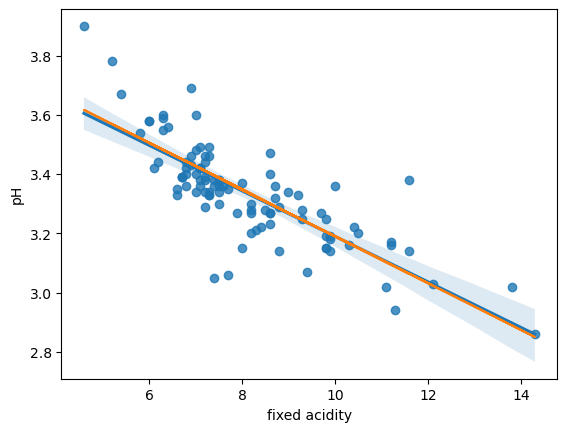

In [122]:
sns.regplot(y='pH', x='fixed acidity', data=df_random2)
plt.plot(x2, b1_2 * x2 + b0_2)

How can you solve the problem ?

En utilisant une autre methode de calcul, (ici j'ai trouvé la bonne solution en estiment par chance la bonne valeur)

# Predict wine quality - regression problem

## Simple Linear regression

Let's try to create a new linear regression. This time, try to find the best model to predict quality in function of pH

Follow the same steps as before: 
- choose a random sample with fixed seed
- use seaborn to see the linear model in this sample
- calculate the best linear regression
- check if the model fits with a new sample

In [123]:
df_random3= wine_df.sample(n=100, replace=False, random_state=10)
df_random3

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1518            7.4             0.470         0.46             2.2      0.114   
1246            7.4             0.740         0.07             1.7      0.086   
544            14.3             0.310         0.74             1.8      0.075   
1343            7.5             0.510         0.02             1.7      0.084   
428             9.1             0.520         0.33             1.3      0.070   
...             ...               ...          ...             ...        ...   
1484            6.8             0.910         0.06             2.0      0.060   
761             9.3             0.655         0.26             2.0      0.096   
1293            7.5             0.755         0.00             1.9      0.084   
619            11.3             0.370         0.41             2.3      0.088   
1062            8.0             0.380         0.44             1.9      0.098   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1518                  7.0                  20.0  0.99647  3.32       0.63   
1246                 15.0                  48.0  0.99502  3.12       0.48   
544                   6.0                  15.0  1.00080  2.86       0.79   
1343                 13.0                  31.0  0.99538  3.36       0.54   
428                   9.0                  30.0  0.99780  3.24       0.60   
...                   ...                   ...      ...   ...        ...   
1484                  4.0                  11.0  0.99592  3.53       0.64   
761                   5.0                  35.0  0.99738  3.25       0.42   
1293                  6.0                  12.0  0.99672  3.34       0.49   
619                   6.0                  16.0  0.99880  3.09       0.80   
1062                  6.0                  15.0  0.99560  3.30       0.64   

      alcohol  quality  
1518     10.5        5  
1246     10.0        5  
544       8.4        6  
1343     10.5        6  
428       9.3        5  
...       ...      ...  
1484     10.9        4  
761       9.6        5  
1293      9.7        4  
619       9.3        5  
1062     11.4        6  

[100 rows x 12 columns]

How good is this model performing? What is the error? is it low or high ?

<AxesSubplot:xlabel='pH', ylabel='quality'>

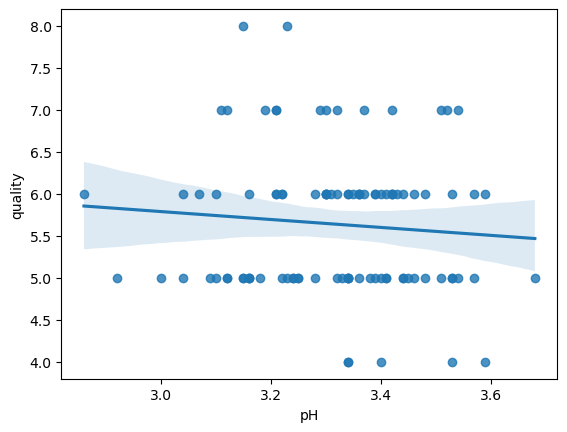

In [124]:
y3 = df_random3['quality']
x3 = df_random3['pH']

sns.regplot(y=y3, x=x3, data=df_random2)


In [125]:
# Instanciate the model
model = LinearRegression()

# Define X and y
Y = df_random3['quality']
X= df_random3[['pH']]

# Train the model on the data
model.fit(X, Y)

# check results
# model's slope (a)
print(model.coef_)

# model's intercept (b)
print(model.intercept_)


[-0.47196402]
7.20583504138771


In [126]:
y_pred=predict(X,7.205835041387711,-0.47196402)
y_pred

pH
1518  5.638914
1246  5.733307
544   5.856018
1343  5.620036
428   5.676672
...        ...
1484  5.539802
761   5.671952
1293  5.629475
619   5.747466
1062  5.648354

[100 rows x 1 columns]

In [127]:
e=calculate_error(Y,y_pred)
e

pH    70.50064
Name: 1518, dtype: float64

l'erreur est trop importante, le modele n'est pas adapté. 

### Using Holdout method 

Let's use the train split method to divide the dataset in 70% train set and 30% test set. This time we will use another feature. Let's try with fixed acidity this time

In [128]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
X = df_random3[['fixed acidity']]
y = df_random3['quality']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

-0.309316727138655

Is this score good or bad? What does it means? 

Try to use regplot to compare with your new model and understand graphically what is happening for the train and test set. you should try two graphics: (one using the X_train,y_train and another one using X_test, y_test)


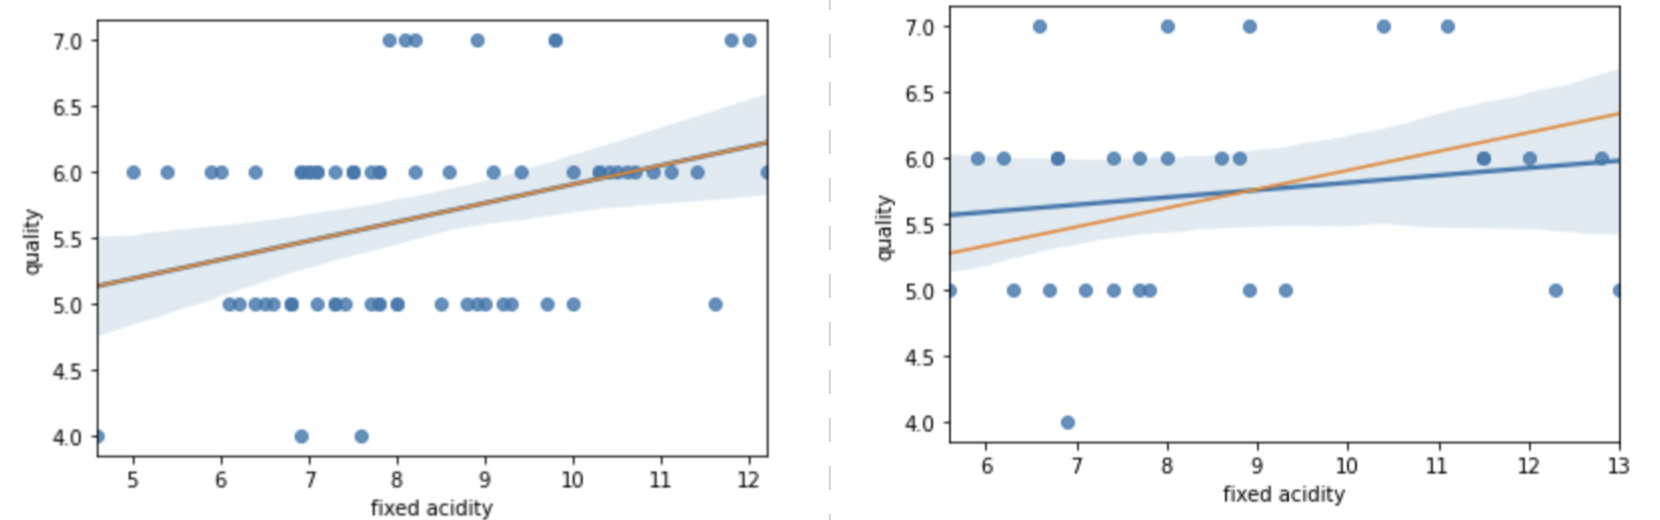

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

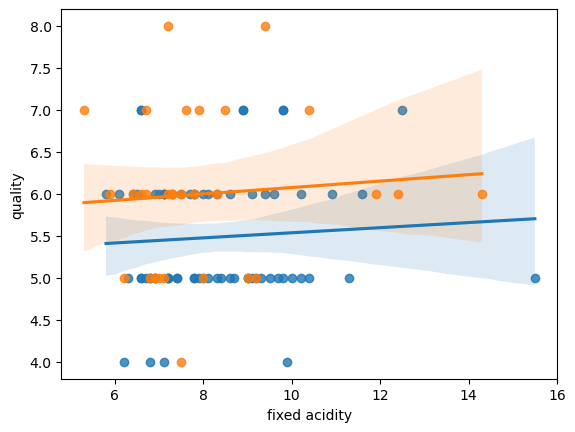

In [129]:
sns.regplot(y= y_train, x= X_train, data=df_random3)
sns.regplot(y= y_test, x=X_test, data=df_random3)

Il faut utiliser un autre modele que la regression lineaire.

Try another feature. Replace your X with volatile acidity, alcohol ...

Which feature increases this value? 

In [130]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
Xa = df_random3[['alcohol']]
ya = df_random3['quality']

# Splitting the data
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(Xa_train, ya_train)

# Evaluate the model with the test set
model.score(Xa_test, ya_test)

0.11421349751871945

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

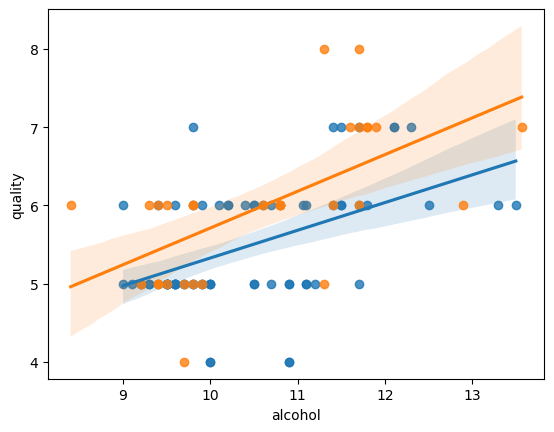

In [131]:
sns.regplot(y= ya_train, x= Xa_train, data=df_random3)
sns.regplot(y= ya_test, x=Xa_test, data=df_random3)

In [132]:
from sklearn.model_selection import train_test_split

# Choose your feature and your target
Xb = df_random3[['sulphates']]
yb = df_random3['quality']

# Splitting the data
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(Xb_train, yb_train)

# Evaluate the model with the test set
model.score(Xb_test, yb_test)

-0.1164494197746655

<AxesSubplot:xlabel='sulphates', ylabel='quality'>

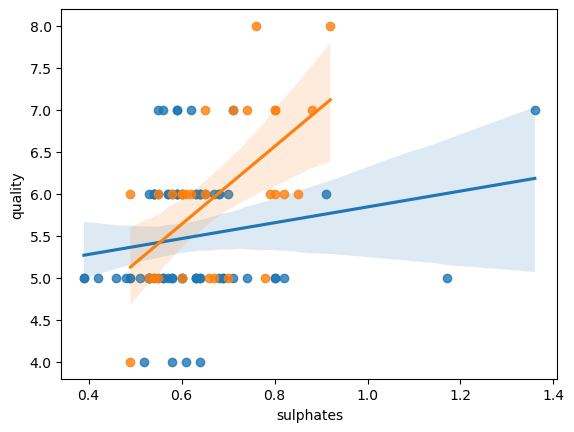

In [133]:
sns.regplot(y= yb_train, x= Xb_train, data=df_random3)
sns.regplot(y= yb_test, x=Xb_test, data=df_random3)

Do you think you can do better ?

non, il faudrait utiliser autre chose que la classification

## Multi linear regression

Let's add multiple features in the regression model. Then create a new model and compare your results with Simple regression. Is it better or worst? 

In [134]:
# Choose your feature and your target
Xm = df_random3[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
ym = df_random3['quality']

# Splitting the data
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=.3, random_state=1)

# Choose your model
model = LinearRegression()

# Fit the model with the train set
model.fit(Xm_train, ym_train)

# Evaluate the model with the test set
model.score(Xm_test, ym_test)

0.18403923277004397

In [155]:
import plotly.express as px
fig = px.scatter_3d(df_random3, x=Xm['pH'], y=ym, z=Xm['alcohol'])
fig.show()

Try with all the features (all without column quality of course). 

Create a new model and compare with the last one. Is it better? Why? 



If you add the column quality in the variable X, what would happen ? 

Hint: read about **data leakage**

Do you think that there are features that are not helping to increase the performance? Which ones do you suspect? 

Do you know a method to identify them? 

How can you find the best combination of features to increase the performance of the model?

# Predict wine quality - classification problem

## convert quality column in 2 classes

Create a classification version (good or bad) of target variable (quality). To do so, let's consider that the wine with quality equal of higher than 7 is good quality and the rest bad quality. 

You can call the new column goodquality

In [135]:
# Create Classification version of target variable
wine_df['qual'] = wine_df.quality.apply(lambda x: 
                                     "good" if x >= 7
                                         else "bad" )

wine_df.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality qual  
0      9.4        5  bad  
1      9.8        5  bad  
2      9.8        5  bad  
3      9.8        6  bad  
4      9.4        5  bad

In [136]:
# Separate feature variables and target variable
newdf= wine_df[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
targ = wine_df['qual']

How many samples are considered as good and how many are bad? Is this balanced

In [137]:
targ.value_counts()

bad     1382
good     217
Name: qual, dtype: int64

no

## Simple Logistic regression

Try to create a first logistic regression model from a sample

In classification, how do you evaluate the performance of the model ?

hint: read more about classification_report from scikit learn

Try different pair of data sets: (pH, goodquality), (fixed acidity, goodquality), (alcohol, goodquality) 

Which pair performs better?

In [138]:
df_randomlo= wine_df.sample(n=100, replace=False, random_state=10)

Xl1 = df_randomlo[['pH']]
yl1 = df_randomlo['qual']

# Splitting the data
Xl1_train, Xl1_test, yl1_train, yl1_test = train_test_split(Xl1, yl1, test_size=.3, random_state=1)

# Choose your model
modell1 = LogisticRegression()

# Fit the model with the train set
modell1.fit(Xl1_train, yl1_train)

# Evaluate the model with the test set
modell1.score(Xl1_test, yl1_test)

0.7333333333333333

In [139]:
from sklearn.metrics import classification_report
yl1_pred=modell1.predict(Xl1_test)
print(classification_report(yl1_test, yl1_pred, target_names=['bad','good']))

              precision    recall  f1-score   support

         bad       0.73      1.00      0.85        22
        good       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
df_randomlo= wine_df.sample(n=100, replace=False, random_state=10)

Xl2 = df_randomlo[['fixed acidity']]
yl2 = df_randomlo['qual']

# Splitting the data
Xl2_train, Xl2_test, yl2_train, yl2_test = train_test_split(Xl2, yl2, test_size=.3, random_state=1)

# Choose your model
modell2 = LogisticRegression()

# Fit the model with the train set
modell2.fit(Xl2_train, yl2_train)

# Evaluate the model with the test set
modell2.score(Xl2_test, yl2_test)

0.7333333333333333

In [141]:
from sklearn.metrics import classification_report
yl2_pred=modell2.predict(Xl2_test)
print(classification_report(yl2_test, yl2_pred, target_names=['bad','good']))

              precision    recall  f1-score   support

         bad       0.73      1.00      0.85        22
        good       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Multi logistic regression

Add new features to the model, try to find the best model reducing the error. 

Use everything you learned so far and good luck :)

In [142]:
from sklearn.linear_model import LogisticRegression
df_randomlo= wine_df.sample(n=100, replace=False, random_state=10)

Xl = df_randomlo[['pH','alcohol', 'fixed acidity', 'density', 'chlorides']]
yl = df_randomlo['qual']

# Splitting the data
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=.3, random_state=1)

# Choose your model
modell = LogisticRegression()

# Fit the model with the train set
modell.fit(Xl_train, yl_train)

# Evaluate the model with the test set
modell.score(Xl_test, yl_test)

0.7333333333333333

In [143]:
from sklearn.metrics import classification_report
yl_pred=modell.predict(Xl_test)
print(classification_report(yl_test, yl_pred, target_names=['bad','good']))

              precision    recall  f1-score   support

         bad       0.73      1.00      0.85        22
        good       0.00      0.00      0.00         8

    accuracy                           0.73        30
   macro avg       0.37      0.50      0.42        30
weighted avg       0.54      0.73      0.62        30



C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lilou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
